In [1]:
import numpy as np
import matplotlib.pyplot as plt
from LinearRegression import *
import torch
from torch import Tensor
from torch.nn import L1Loss
from torch.optim import SGD
from safetensors.torch import save_file
from pathlib import Path
device = 'mps' if torch.backends.mps.is_available() else 'cuda' if torch.backends.cuda.is_available() else 'cpu'
torch.set_default_device(device)

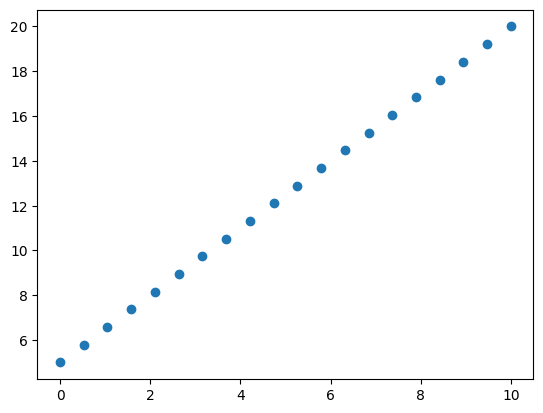

In [2]:
x = torch.linspace(0, 10, 20)
weight = 1.5
bias = 5
y = x * weight + bias
plt.scatter(x.cpu(), y.cpu())

In [3]:
model = LinearRegression()
loss_fun = L1Loss()
optimizer = SGD(params=model.parameters(), lr=1e-4)

In [4]:
trains = int(len(x) * 0.7)
x_train = x[:trains]
y_train = y[:trains]
x_test = x[trains:]
y_test = y[trains:]

In [5]:
epochs = 120000

model.train()
for epoch in range(epochs):
    y_pred = model(x_train)

    loss = loss_fun(y_pred, y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model.eval()
    with torch.inference_mode():
        test_pred = model(x_test)
        loss_test = loss_fun(test_pred, y_test)

    if epoch % 10000 == 0:
        print(f"loss {loss}, test loss {loss_test}")

loss 6.567808628082275, test loss 10.415276527404785
loss 1.4805946350097656, test loss 2.397343873977661
loss 1.29537034034729, test loss 2.472935438156128
loss 1.1126717329025269, test loss 2.124192953109741
loss 0.9299806952476501, test loss 1.774993896484375
loss 0.7472907304763794, test loss 1.4261360168457031
loss 0.564597487449646, test loss 1.0772775411605835
loss 0.3819095194339752, test loss 0.7287194132804871
loss 0.19921986758708954, test loss 0.37986183166503906
loss 0.01652836799621582, test loss 0.03130499646067619
loss 0.0003052439133170992, test loss 0.002432187320664525
loss 0.0003052439133170992, test loss 0.002432187320664525


In [6]:
list(model.parameters())

[Parameter containing:
 tensor([1.4999], device='mps:0', requires_grad=True),
 Parameter containing:
 tensor([4.9999], device='mps:0', requires_grad=True)]

In [7]:
model_dir = Path("models")
model_dir.mkdir(exist_ok=True)
model_path = model_dir / Path("model.safetensors")

In [8]:
save_file(model.state_dict(), filename=model_path)